# Importing Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

# Importing the dataset

In [8]:
data = pd.read_csv('/Users/iswariya/Desktop/ML project/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Analysing the shape of dataset

In [9]:
data.shape

(2111, 17)

# Describing the target variable

In [10]:
data['NObeyesdad'].describe()

count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object

In [11]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Checking if there are any null values in the dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Checking the cardinality of all the features in the datast

In [13]:
numerical_features = (data.select_dtypes(include=['float64']).columns)
categorical_features = (data.select_dtypes(include=['object']).columns)
for columns in categorical_features:
    print('{} value counts'.format(columns))
    print(data[columns].value_counts())
    print()
for column in numerical_features:
    print('{} value counts'.format(column))
    print(data[column].value_counts())
    print()

Gender value counts
Male      1068
Female    1043
Name: Gender, dtype: int64

family_history_with_overweight value counts
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

FAVC value counts
yes    1866
no      245
Name: FAVC, dtype: int64

CAEC value counts
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

SMOKE value counts
no     2067
yes      44
Name: SMOKE, dtype: int64

SCC value counts
no     2015
yes      96
Name: SCC, dtype: int64

CALC value counts
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

MTRANS value counts
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

NObeyesdad value counts
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
N

# Converting Binary variable values to 0/1

In [14]:
data_1 = data[['Gender', 'Age', 'family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP','SMOKE', 'SCC']]
data['family_history_with_overweight'] = data_1['family_history_with_overweight'].map({'yes':1,'no':0})
data['Gender'] = data_1['Gender'].map({'Male':1,'Female':0})
data['FAVC'] = data_1['FAVC'].map({'yes':1,'no':0})
data['SMOKE'] = data_1['SMOKE'].map({'yes':1,'no':0})
data['SCC'] = data_1['SCC'].map({'yes':1,'no':0})

# Encoding Ordinal variables

In [15]:
ord_encoders = {}
ord_vars = ('CAEC','CALC','NObeyesdad')
ord_vals = [(('no','Sometimes','Frequently','Always'),),
           (('no','Sometimes','Frequently','Always'),),
            (('Insufficient_Weight','Normal_Weight','Overweight_Level_I',
             'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'),)]
for i,key in enumerate(ord_vars):
    print(key,ord_vals[i])
    ord_encoders[key] = OrdinalEncoder(categories=ord_vals[i])
    ord_encoders[key].fit(np.asarray(data[key]).reshape(-1,1))
    col = 'ord_'+key
    data[col] = ord_encoders[key].transform(np.asarray(data[key]).reshape(-1,1))

CAEC (('no', 'Sometimes', 'Frequently', 'Always'),)
CALC (('no', 'Sometimes', 'Frequently', 'Always'),)
NObeyesdad (('Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'),)


In [16]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,ord_CAEC,ord_CALC,ord_NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0,1.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,1.0,1.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1.0,2.0,1.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,1.0,2.0,2.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1.0,1.0,3.0


In [17]:
data.shape

(2111, 20)

# Performing one hot encode of the variable MTRANS

In [18]:
data = pd.concat([data,pd.get_dummies(data.MTRANS).add_prefix('MTRANS_')],axis=1)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,ord_CAEC,ord_CALC,ord_NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,...,Public_Transportation,Normal_Weight,1.0,1.0,1.0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,...,Public_Transportation,Normal_Weight,1.0,2.0,1.0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,...,Walking,Overweight_Level_I,1.0,2.0,2.0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,...,Public_Transportation,Overweight_Level_II,1.0,1.0,3.0,0,0,0,1,0


In [19]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'ord_CAEC', 'ord_CALC',
       'ord_NObeyesdad', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [20]:
X_columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP','SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'ord_CAEC',
          'ord_CALC','MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
          'MTRANS_Public_Transportation', 'MTRANS_Walking']
data[['ord_NObeyesdad'] + X_columns]


,ord_NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,SCC,FAF,TUE,ord_CAEC,ord_CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,...,0,0.000000,1.000000,1.0,0.0,0,0,0,1,0
1,1.0,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,...,1,3.000000,0.000000,1.0,1.0,0,0,0,1,0
2,1.0,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,...,0,2.000000,1.000000,1.0,2.0,0,0,0,1,0
3,2.0,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,...,0,2.000000,0.000000,1.0,2.0,0,0,0,0,1
4,3.0,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,...,0,0.000000,0.000000,1.0,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6.0,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,...,0,1.676269,0.906247,1.0,1.0,0,0,0,1,0
2107,6.0,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,...,0,1.341390,0.599270,1.0,1.0,0,0,0,1,0
2108,6.0,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,...,0,1.414209,0.646288,1.0,1.0,0,0,0,1,0
2109,6.0,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,...,0,1.139107,0.586035,1.0,1.0,0,0,0,1,0


# Min Max Scaling of X column

In [21]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data[X_columns] = scaler.fit_transform(data[X_columns])
data[X_columns]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,ord_CAEC,ord_CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.0,0.500000,0.0,0.000000,0.500000,0.333333,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,1.0,1.000000,1.0,1.000000,0.000000,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.0,0.500000,0.0,0.666667,0.500000,0.333333,0.666667,0.0,0.0,0.0,1.0,0.0
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.0,0.500000,0.0,0.666667,0.000000,0.333333,0.666667,0.0,0.0,0.0,0.0,1.0
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.0,0.500000,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.148443,0.491943,0.689616,1.0,1.0,1.0,0.666667,0.0,0.364070,0.0,0.558756,0.453124,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.169850,0.563366,0.707037,1.0,1.0,1.0,0.666667,0.0,0.502565,0.0,0.447130,0.299635,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.181362,0.570200,0.706637,1.0,1.0,1.0,0.666667,0.0,0.527097,0.0,0.471403,0.323144,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.220467,0.546132,0.704079,1.0,1.0,1.0,0.666667,0.0,0.926170,0.0,0.379702,0.293017,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

# Making train test split of the dataset

In [23]:
X = data[X_columns]
y = data['ord_NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X Train {}'.format(X_train.shape))
print('X Test {}'.format(X_test.shape))
print('y Train {}'.format(y_train.shape))
print('y test {}'.format(y_test.shape))

X Train (1688, 20)
X Test (423, 20)
y Train (1688,)
y test (423,)


In [24]:
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred1 = clf_gini.predict(X_test)
print("Classification Report: \n\n",classification_report(y_test, y_pred1))
print("Accuracy: ",accuracy_score(y_test, y_pred1))

Classification Report: 

               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        56
         1.0       0.87      0.87      0.87        62
         2.0       0.91      0.91      0.91        56
         3.0       0.98      0.96      0.97        50
         4.0       0.96      0.92      0.94        78
         5.0       0.93      0.95      0.94        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423

Accuracy:  0.9385342789598109


In [26]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred1))      
print("Accuracy : ", accuracy_score(y_test,y_pred1)*100)      
print("Report : ", classification_report(y_test, y_pred1))

Confusion Matrix:  [[54  2  0  0  0  0  0]
 [ 5 54  3  0  0  0  0]
 [ 0  5 51  0  0  0  0]
 [ 0  0  2 48  0  0  0]
 [ 0  1  0  1 72  4  0]
 [ 0  0  0  0  3 55  0]
 [ 0  0  0  0  0  0 63]]
Accuracy :  93.85342789598108
Report :                precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        56
         1.0       0.87      0.87      0.87        62
         2.0       0.91      0.91      0.91        56
         3.0       0.98      0.96      0.97        50
         4.0       0.96      0.92      0.94        78
         5.0       0.93      0.95      0.94        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



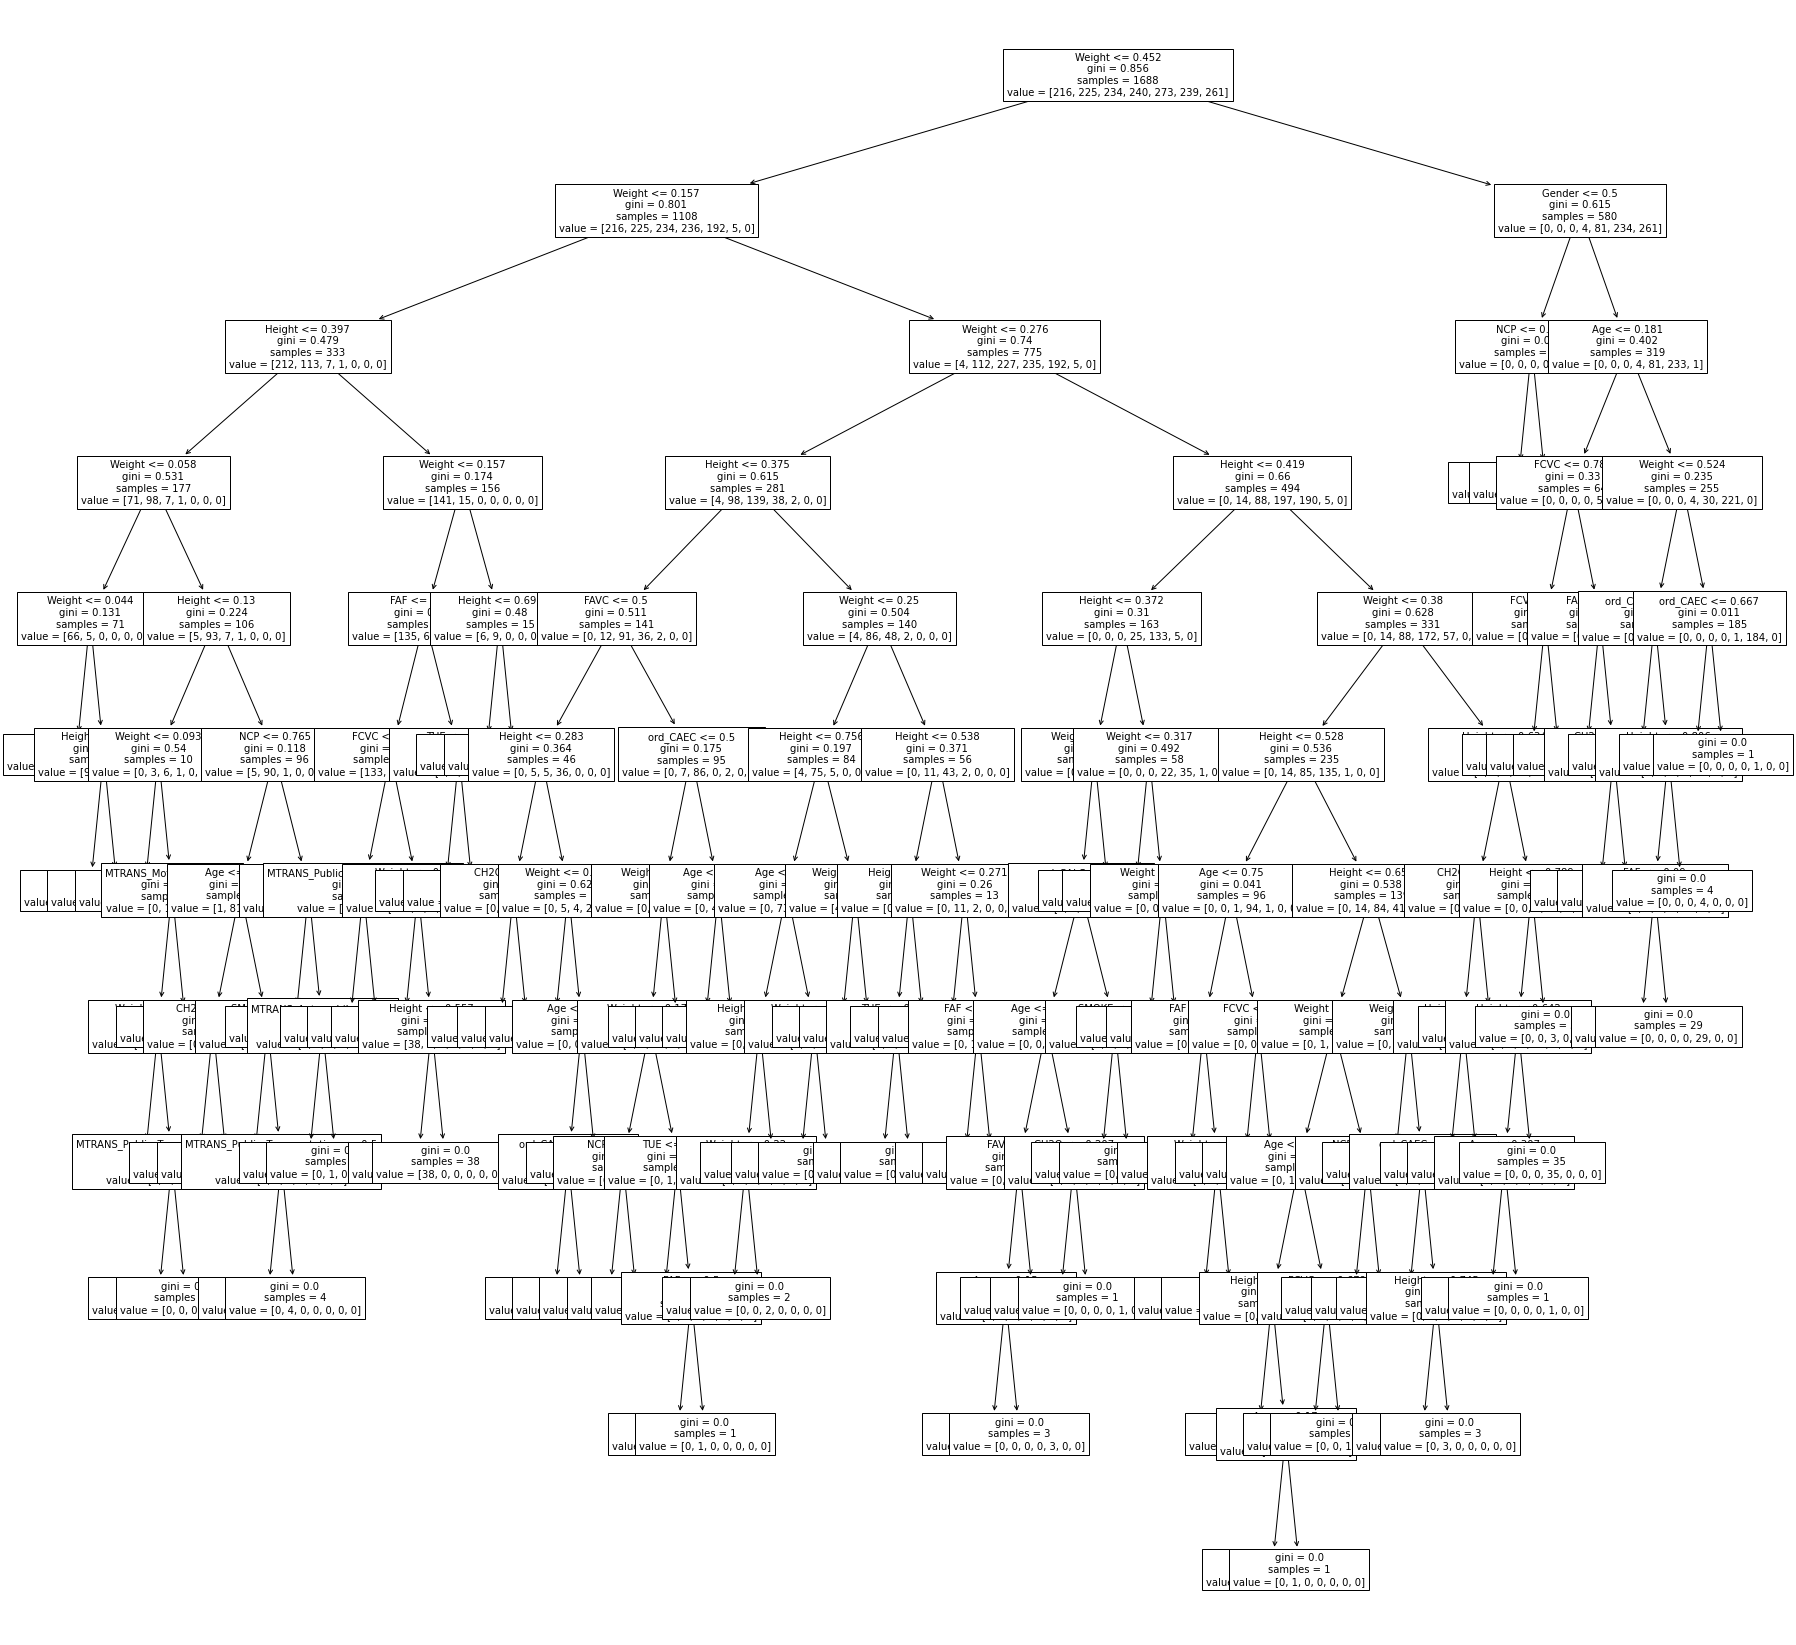

In [27]:
plt.figure(figsize=(30, 30))  # set plot size (denoted in inches)
plot_tree(clf_gini, fontsize=10, feature_names=X_train.columns)
plt.show()

Feature: 0, Score: 0.15678
Feature: 1, Score: 0.04593
Feature: 2, Score: 0.21670
Feature: 3, Score: 0.47959
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.02710
Feature: 6, Score: 0.01316
Feature: 7, Score: 0.00838
Feature: 8, Score: 0.00095
Feature: 9, Score: 0.00443
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00839
Feature: 12, Score: 0.00372
Feature: 13, Score: 0.00794
Feature: 14, Score: 0.02191
Feature: 15, Score: 0.00111
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00106
Feature: 18, Score: 0.00284
Feature: 19, Score: 0.00000


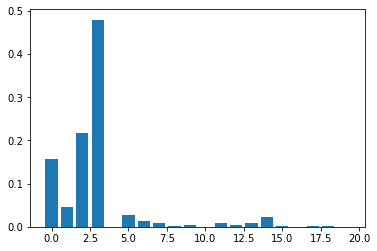

In [28]:
# get importance
importance = clf_gini.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## we can see that "Weight" is the most important feature in "Obesity determination",
## Also Gender,age,height are also important features 

In [99]:
# Feature selection based on importance ( selecting the top 10 out of 20 features)
features_selected = ['Gender', 'Age', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'FAF','ord_CALC','ord_CAEC']

X = data[features_selected]
y = data['ord_NObeyesdad']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
print('X Train {}'.format(X_train1.shape))
print('X Test {}'.format(X_test1.shape))
print('y Train {}'.format(y_train1.shape))
print('y test {}'.format(y_test1.shape))

clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train1, y_train1)

y_pred2 = clf_gini.predict(X_test1)
print("Classification Report: \n\n",classification_report(y_test1, y_pred2))
print("Accuracy: ",accuracy_score(y_test1, y_pred2))

print("Confusion Matrix: ", confusion_matrix(y_test1, y_pred2))      
print("Accuracy : ", accuracy_score(y_test1,y_pred2)*100)      
print("Report : ", classification_report(y_test1, y_pred2))

X Train (1688, 10)
X Test (423, 10)
y Train (1688,)
y test (423,)
Classification Report: 

               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        56
         1.0       0.93      0.90      0.92        62
         2.0       0.91      0.95      0.93        56
         3.0       0.94      0.94      0.94        50
         4.0       0.95      0.92      0.94        78
         5.0       0.96      0.95      0.96        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423

Accuracy:  0.9479905437352246
Confusion Matrix:  [[55  1  0  0  0  0  0]
 [ 4 56  2  0  0  0  0]
 [ 0  3 53  0  0  0  0]
 [ 0  0  2 47  1  0  0]
 [ 0  0  1  3 72  2  0]
 [ 0  0  0  0  3 55  0]
 [ 0  0  0  0  0  0 63]]
Accuracy :  94.79905437352247
Report :                precision    recall  f1-score   support

In [100]:
# Gridsearchcv
best_parameters= {
    'max_leaf_nodes':list(range(2,200)),
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,20))
    }
DT_new = GridSearchCV(DecisionTreeClassifier(), best_parameters)

In [101]:
DT_new.fit(X_train1, y_train1)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

In [98]:
DT_new.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 176}

In [102]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes= 176, criterion= 'entropy', max_depth= 11)
pruned_tree = pruned_tree.fit(X_train1, y_train1)
y_pred_pruned = pruned_tree.predict(X_test1)

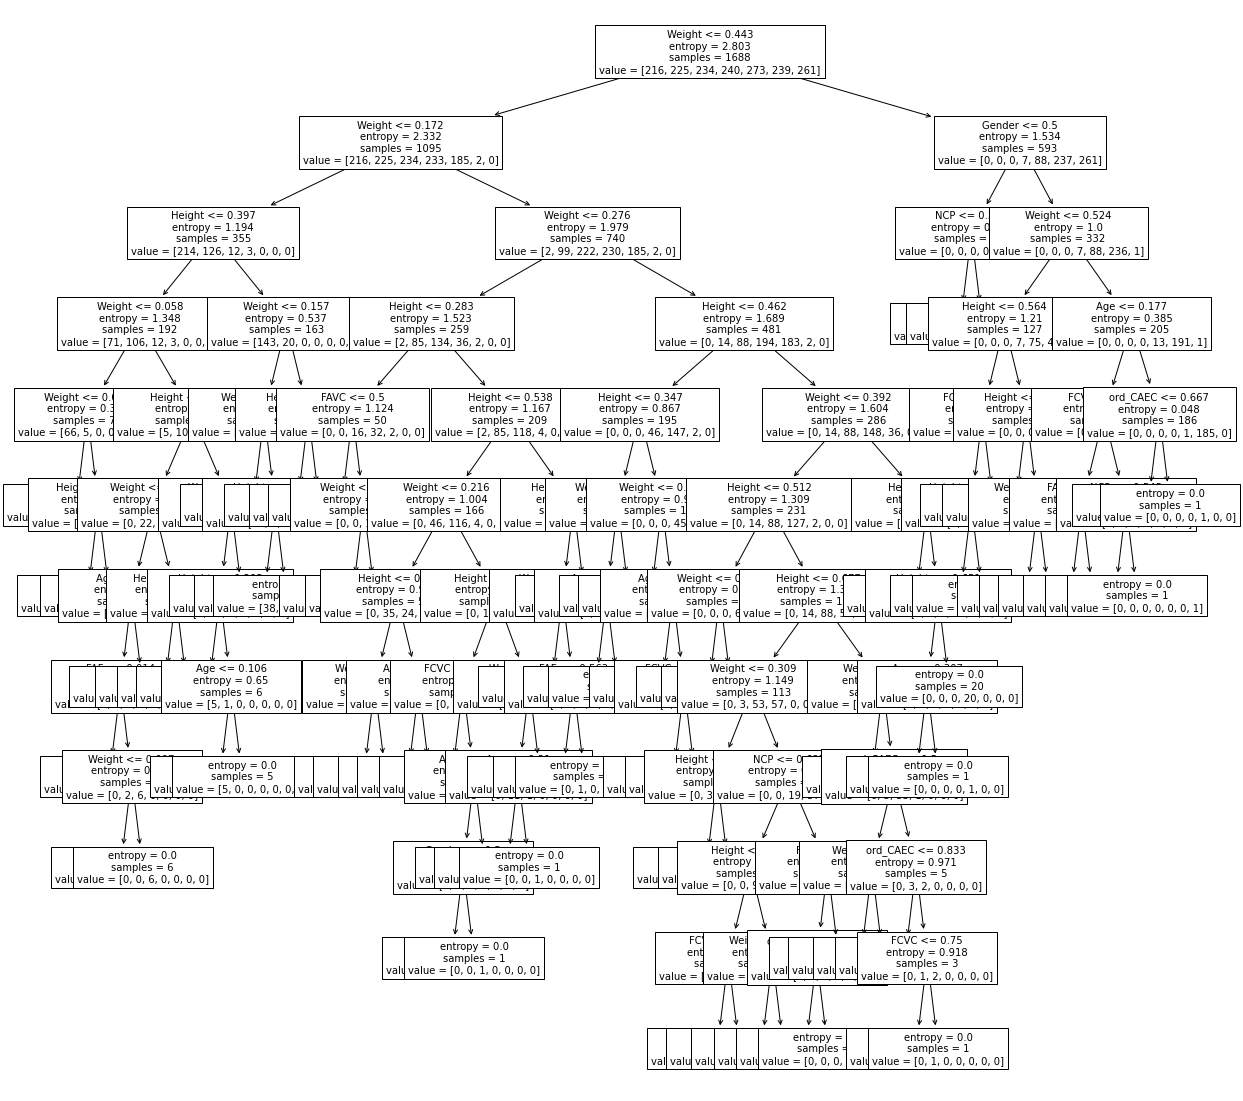

In [103]:
plt.figure(figsize=(20, 20))  # set plot size (denoted in inches)
plot_tree(pruned_tree, fontsize=10, feature_names=X_train1.columns)
plt.show()

In [143]:
print("Accuracy % of tuned decision tree ",accuracy_score(y_test1,y_pred_pruned)*100)

y_names = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
             'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
print(confusion_matrix(y_test1, y_pred_pruned))
print(classification_report(y_test1, y_pred_pruned,target_names=y_names))

Accuracy % of tuned decision tree  95.74468085106383
[[53  3  0  0  0  0  0]
 [ 5 55  2  0  0  0  0]
 [ 0  1 55  0  0  0  0]
 [ 0  0  3 47  0  0  0]
 [ 0  0  0  0 75  3  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.95      0.93        56
      Normal_Weight       0.93      0.89      0.91        62
 Overweight_Level_I       0.92      0.98      0.95        56
Overweight_Level_II       1.00      0.94      0.97        50
     Obesity_Type_I       0.99      0.96      0.97        78
    Obesity_Type_II       0.95      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



In [157]:
metrics=precision_recall_fscore_support(y_test1, y_pred_pruned, average='weighted')
print("Decision Tree:")
print("Precision: ",metrics[0]*100)
print("Recall: ",metrics[1]*100)
print("F1 score: ",metrics[2]*100)
print("Accuracy:",accuracy_score(y_test1,y_pred_pruned)*100)

Decision Tree:
Precision:  95.83357955235333
Recall:  95.74468085106383
F1 score:  95.74439541480572
Accuracy: 95.74468085106383


# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

random_forest = RandomForestClassifier(random_state=42 )
random_forest.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [106]:
y_rf_pred = random_forest.predict(X_test)

print("Accuracy % of random forest ",accuracy_score(y_test,y_rf_pred)*100)
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))

Accuracy % of random forest  94.79905437352247
[[54  2  0  0  0  0  0]
 [ 1 56  4  1  0  0  0]
 [ 0  6 49  1  0  0  0]
 [ 0  0  2 48  0  0  0]
 [ 0  0  1  1 74  2  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        56
         1.0       0.88      0.90      0.89        62
         2.0       0.88      0.88      0.88        56
         3.0       0.94      0.96      0.95        50
         4.0       0.99      0.95      0.97        78
         5.0       0.97      0.98      0.97        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



Feature: 0, Score: 0.05614
Feature: 1, Score: 0.09487
Feature: 2, Score: 0.09568
Feature: 3, Score: 0.31173
Feature: 4, Score: 0.03063
Feature: 5, Score: 0.01562
Feature: 6, Score: 0.08677
Feature: 7, Score: 0.05247
Feature: 8, Score: 0.00246
Feature: 9, Score: 0.04785
Feature: 10, Score: 0.00659
Feature: 11, Score: 0.04865
Feature: 12, Score: 0.05191
Feature: 13, Score: 0.03361
Feature: 14, Score: 0.03134
Feature: 15, Score: 0.01240
Feature: 16, Score: 0.00048
Feature: 17, Score: 0.00072
Feature: 18, Score: 0.01632
Feature: 19, Score: 0.00379


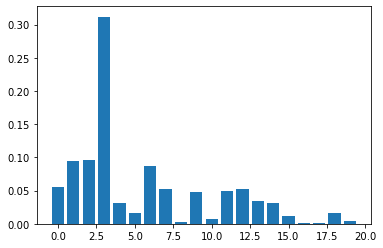

In [107]:


# get importance
rf_importance = random_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(rf_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(rf_importance))], rf_importance)
plt.show()

## As expected weight has the highest importance score

In [109]:
# Feature selection based on importance ( selecting the top 10 out of 20 features)
features_selected = ['Gender', 'Age', 'Height', 'Weight', 'CH2O', 'FCVC', 'NCP', 'FAF','TUE','ord_CAEC']

X = data[features_selected]
y = data['ord_NObeyesdad']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
print('X Train {}'.format(X_train2.shape))
print('X Test {}'.format(X_test2.shape))
print('y Train {}'.format(y_train2.shape))
print('y test {}'.format(y_test2.shape))

clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train1, y_train1)

y_rf_pred2 = clf_gini.predict(X_test2)
print("Classification Report: \n\n",classification_report(y_test2, y_rf_pred2))
print("Accuracy: ",accuracy_score(y_test2, y_rf_pred2))

print("Confusion Matrix: ", confusion_matrix(y_test2, y_rf_pred2))      
print("Accuracy : ", accuracy_score(y_test2,y_rf_pred2)*100)      
print("Report : ", classification_report(y_test2, y_rf_pred2))

X Train (1688, 10)
X Test (423, 10)
y Train (1688,)
y test (423,)
Classification Report: 

               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        56
         1.0       0.90      0.90      0.90        62
         2.0       0.87      0.82      0.84        56
         3.0       0.83      0.90      0.87        50
         4.0       0.92      0.86      0.89        78
         5.0       0.90      0.91      0.91        58
         6.0       1.00      1.00      1.00        63

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423

Accuracy:  0.9101654846335697
Confusion Matrix:  [[55  1  0  0  0  0  0]
 [ 4 56  2  0  0  0  0]
 [ 0  5 46  5  0  0  0]
 [ 0  0  3 45  1  1  0]
 [ 0  0  2  4 67  5  0]
 [ 0  0  0  0  5 53  0]
 [ 0  0  0  0  0  0 63]]
Accuracy :  91.01654846335697
Report :                precision    recall  f1-score   support

In [117]:
param_grid = { 
    'n_estimators': [500, 1000,1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,15,20,30],
    'criterion' :['gini', 'entropy']
}

In [137]:
CV_rfc = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train2, y_train) # no change in y

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 30, 45, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 1000, 1500, 2000]})

In [138]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 500}

In [131]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=15, criterion='entropy')

In [135]:
rfc1.fit(X_train2, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=500,
                       random_state=42)

In [139]:
pred=rfc1.predict(X_test2)

In [142]:
print("Accuracy for tuned Random Forest: ",accuracy_score(y_test,pred)*100)

Accuracy for tuned Random Forest:  96.2174940898345
